# 1st Deliverable

## Preprocessing and Feature Engineering

In [2]:
#Arno
import pandas as pd

### Loading the datasets into pandas dataframes and inspecting them
We had an issue where our data (orignally csv files) were being converted into gsheets which cannot be read by pandas directly, so we followed a [guide](https://towardsdatascience.com/read-data-from-google-sheets-into-pandas-without-the-google-sheets-api-5c468536550) on how to export gsheets as csv files.

In [3]:
#Arno
baseURL = 'https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv'
primaryID = '1SMsJrWMG4Jbk0HxL9WCEgjsdxt4h4ZlTnNJJ-ocbNAQ'
primaryURL = baseURL.format(primaryID)
secondaryID = '1mgY3svjhBCGfUsnCFkekEqODFip5785FyYB_jOBG0R8'
secondaryURL = baseURL.format(secondaryID)
tertiaryID = '1p5zUjwBjFbCcjgkVU7g3lw5awXoTekTGA25Q6VxDok0'
tertiaryURL = baseURL.format(tertiaryID)

In [4]:
#Arno
primaryDS = pd.read_csv(primaryURL)
primaryDS.info()
primaryColumns = list(primaryDS.columns)
print("\ncolumns =", primaryColumns, "\n")
primaryDS.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      4846 non-null   object
 1   News Headline  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB

columns = ['Sentiment', 'News Headline'] 



,Sentiment,News Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [5]:
#Arno
secondaryDS = pd.read_csv(secondaryURL)
secondaryDS.info()
secondaryColumns = list(secondaryDS.columns)
print("\ncolumns =", secondaryColumns, "\n")
secondaryDS.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       211 non-null    object
 1   sentiment  211 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB

columns = ['text', 'sentiment'] 



,text,sentiment
0,Global COVID-19 death toll exceeds 4 million.,0
1,"reports 67,208 new COVID-19 cases, 2,330 deaths.",0
2,China reports 23 new COVID-19 cases versus 19 ...,0
3,"India records 91,702 new COVID-19 cases over p...",0
4,sharply raises COVID-19 death toll prompting c...,0


In [6]:
#Arno
tertiaryDS = pd.read_csv(tertiaryURL)
tertiaryDS.info()
tertiaryColumns = list(tertiaryDS.columns)
print("\ncolumns =", tertiaryColumns, "\n")
tertiaryDS.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   published_at     598 non-null    object 
 1   title            598 non-null    object 
 2   description      598 non-null    object 
 3   url              598 non-null    object 
 4   sentiment        598 non-null    object 
 5   sentiment_score  598 non-null    float64
dtypes: float64(1), object(5)
memory usage: 28.2+ KB

columns = ['published_at', 'title', 'description', 'url', 'sentiment', 'sentiment_score'] 



,published_at,title,description,url,sentiment,sentiment_score
0,2021-10-21T14:40:39+00:00,Exclusive: Industrialist Nikhil Merchant leads...,Low-profile Gujarat businessman wants to add P...,https://www.businesstoday.in/latest/corporate/...,neutral,0.711336
1,2021-10-21T13:52:13+00:00,India’s Reliance gets shareholders’ nod to add...,BENGALURU &#8212; India&#8217;s Reliance Indus...,https://financialpost.com/pmn/business-pmn/ind...,neutral,0.800176
2,2021-10-21T12:45:52+00:00,Rogers misses quarterly revenue estimates,Rogers Communications Inc reported third-quart...,https://torontosun.com/business/money-news/rog...,negative,0.973185
3,2021-10-21T12:40:35+00:00,Exclusive: Tycoon Nikhil Merchant leads race f...,Low-profile Gujarat businessman wants to add P...,https://www.businesstoday.in/latest/corporate/...,neutral,0.619371
4,2021-10-21T11:43:53+00:00,BP to Open Fuel Station in India Amid Record P...,BP and Reliance Industries signed a $6 billion...,https://sputniknews.com/20211021/bp-to-open-fu...,positive,0.929962


### Removing unnecessary columns
This is only necessary for the tertiary dataset.


In [7]:
#Arno
tertiaryDS = tertiaryDS.drop(labels=["published_at","description","url","sentiment_score"], axis=1)
tertiaryDS.head()

,title,sentiment
0,Exclusive: Industrialist Nikhil Merchant leads...,neutral
1,India’s Reliance gets shareholders’ nod to add...,neutral
2,Rogers misses quarterly revenue estimates,negative
3,Exclusive: Tycoon Nikhil Merchant leads race f...,neutral
4,BP to Open Fuel Station in India Amid Record P...,positive


In [8]:
# Daniel
# Mapping -1,0,1 to sentiment based on previous values (positive,negative,neutral)

primarySentValues = {'negative': -1, 'neutral': 0, 'positive': 1}

primaryDS['Sentiment'] = primaryDS['Sentiment'].map(primarySentValues)
primaryDS.head()

,Sentiment,News Headline
0,0,"According to Gran , the company has no plans t..."
1,0,Technopolis plans to develop in stages an area...
2,-1,The international electronic industry company ...
3,1,With the new production plant the company woul...
4,1,According to the company 's updated strategy f...


In [9]:
# Daniel
secondarySentValues = {0: -1, 1: 0, 2: 1}

secondaryDS['sentiment'] = secondaryDS['sentiment'].map(secondarySentValues)
print(secondaryDS)

                                                  text  sentiment
0        Global COVID-19 death toll exceeds 4 million.         -1
1    reports 67,208 new COVID-19 cases, 2,330 deaths.          -1
2    China reports 23 new COVID-19 cases versus 19 ...         -1
3    India records 91,702 new COVID-19 cases over p...         -1
4    sharply raises COVID-19 death toll prompting c...         -1
..                                                 ...        ...
206  U.S. equity futures were trading higher the mo...          1
207  China, US commerce chiefs to cooperate on hand...          1
208  Stock investors celebrate red-hot five-quarter...          1
209   Wall Street’s roaring 2021 is as good as it gets          1
210  Investor sees 'incredibly strong earnings' in ...          1

[211 rows x 2 columns]


In [10]:
# Daniel
tertiarySentValues = {'negative': -1, 'neutral': 0, 'positive': 1}

tertiaryDS['sentiment'] = tertiaryDS['sentiment'].map(tertiarySentValues)
tertiaryDS.head()

,title,sentiment
0,Exclusive: Industrialist Nikhil Merchant leads...,0
1,India’s Reliance gets shareholders’ nod to add...,0
2,Rogers misses quarterly revenue estimates,-1
3,Exclusive: Tycoon Nikhil Merchant leads race f...,0
4,BP to Open Fuel Station in India Amid Record P...,1


### Combining all three datasets

In [11]:
# Arno
# first though we need to reorder the columns of the primary dataset
primaryDS = primaryDS.reindex(columns=["News Headline","Sentiment"])

In [12]:
# Arno
primaryDS.head()

,News Headline,Sentiment
0,"According to Gran , the company has no plans t...",0
1,Technopolis plans to develop in stages an area...,0
2,The international electronic industry company ...,-1
3,With the new production plant the company woul...,1
4,According to the company 's updated strategy f...,1


In [13]:
# Arno
# now we need to standardize the names of the columns - we'll use "headline" and "sentiment"
primaryDS = primaryDS.rename(columns={"News Headline":"headline","Sentiment":"sentiment"})
secondaryDS = secondaryDS.rename(columns={"text":"headline"})
tertiaryDS = tertiaryDS.rename(columns={"title":"headline"})

In [14]:
# Arno
primaryDS.head()

,headline,sentiment
0,"According to Gran , the company has no plans t...",0
1,Technopolis plans to develop in stages an area...,0
2,The international electronic industry company ...,-1
3,With the new production plant the company woul...,1
4,According to the company 's updated strategy f...,1


In [15]:
# Arno
# now we combine them all
data = primaryDS.append(secondaryDS)
data = data.append(tertiaryDS)

In [16]:
# Arno
# let's make sure we got all the data from the original three into our master data dataframe by comparing the row count
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5655 entries, 0 to 597
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headline   5655 non-null   object
 1   sentiment  5655 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 132.5+ KB


,headline,sentiment
0,"According to Gran , the company has no plans t...",0
1,Technopolis plans to develop in stages an area...,0
2,The international electronic industry company ...,-1
3,With the new production plant the company woul...,1
4,According to the company 's updated strategy f...,1


In [17]:
# Arno
len(primaryDS)+len(secondaryDS)+len(tertiaryDS)

5655

### Removing rows that have headlines which contain irregular symbols

In [18]:
# Daniel
# Cleaning data according to a regular expression:
import regex as re

# acceptable_chars = 'a-zA-Z0-9\s,.:\'?!$%&()_-'

def clean_h(h): 
  h = h

  h = re.sub(r'\s+', ' ', h) # For extra spaces
  h = re.sub(r'\s+\-+\s+(\-+\s+)*', ' - ', h) # For extra "-"

  h = re.sub(r'(\d)\s+percent\b', r'\1%', h)
  #h = re.sub(r'(\d+(.\d+)?)\s+(dollar|dollars)\b', r'$\1', h)
  h = re.sub(r'(\d)\s+\.(\d)', r'\1.\2', h)
  h = re.sub(r'\s+\.(\d)', r' 0.\1', h)
  h = re.sub(r',+|\s\.+|\.+\Z', '', h)
  h = re.sub(r'\$+\s+', '$', h)
  h = re.sub(r'\s+%+', '%', h)
  h = re.sub(r'\s+:+', ':', h)
  
  h = re.sub(r'\s\'s', '\'s', h)

  # EUR / EURO
  h = re.sub(r'\beur\s+o\b', 'euro', h)
  h = re.sub(r'\beur\s*([^o])', r'euro \1', h)
  h = re.sub(r'\bmeur\b', 'm euro', h)
  h = re.sub(r'(\d+)(m|mn|mln)', r'\1 \2', h)
  h = re.sub(r'\bm\b|\bmn\b|\bmln\b', 'million', h) # Million abbreviations
  h = re.sub(r'(\d+%?)\s*\-\s*($?\d+)', r'\1–\2', h) # For number ranges (character: en-dash)
  h = re.sub(r'([a-z]+)\s+\-\s+([a-z]+)', r'\1-\2', h) # For hypens
  # Parenthesis:
  h = re.sub(r'\(\s+', "(", h)
  h = re.sub(r'\s+\)', ")", h)

  h = re.sub(r'\s+', ' ', h) # For extra spaces

  return h

#cleaned_h = []
already_clean_h = []
for h in data['headline']: # for each headline
  h = h.lower()
  # ^ indicates not when in [] - if the string contains anything not in our allowable character set replaces it with nothing, then strip spaces from beginning and end 
  #cleaned_h.append(re.sub(r'[^a-zA-Z0-9\s,.:\'?!$%&()_-]+', '', h).strip()) 
  if not bool(re.search('[^a-z0-9\s,.:\'?!$%&()_-]+', h)):
    already_clean_h.append(clean_h(h).strip())
  else:
    already_clean_h.append(None)

#data = data.assign(cleaned = cleaned_h) # the cleaned column contains both the headlines which were clean as-was and the columns which were made clean
data = data.assign(headline = already_clean_h) # the clean column contains only headlines which were clean as-was

data = data.dropna() # removes missing values

data.info()
data.head(15)
  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 0 to 597
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headline   5003 non-null   object
 1   sentiment  5003 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 117.3+ KB


,headline,sentiment
0,according to gran the company has no plans to ...,0
1,technopolis plans to develop in stages an area...,0
3,with the new production plant the company woul...,1
4,according to the company's updated strategy fo...,1
5,financing of aspocomp's growth aspocomp is agg...,1
6,for the last quarter of 2010 componenta's net ...,1
7,in the third quarter of 2010 net sales increas...,1
8,operating profit rose to euro 13.1 million fro...,1
9,operating profit totalled euro 21.1 million up...,1
10,teliasonera tlsn said the offer is in line wit...,1


### Looking for and expanding contractions
"'s" which indicated possession were simply dropped during this process

In [19]:
# Arno
# found here: https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/#h2_6
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}
# make everything in dict lower case (especially all the instances of "I")
keys = list(contractions_dict.keys())
for key in keys:
    lowerKey = key.lower()
    lowerVal = contractions_dict[key].lower()
    del contractions_dict[key]
    contractions_dict[lowerKey] = lowerVal

In [20]:
# Arno
contractionCounter = 0
indicesOfContractions = []
contractionsFound = []
for i in range(len(data.index)):
  for word in data.iloc[i]["headline"].split(' '):
    if word in contractions_dict.keys(): 
      contractionCounter+=1
      indicesOfContractions.append(i)
      contractionsFound.append(word)
print(f"Found {contractionCounter} contraction")

# convert "isn't" to "is not", "it's" to "it is", etc.
for i in range(len(data.index)):
  for word in data.iloc[i,0].split(' '):
    if word in contractions_dict.keys(): 
      data.iloc[i,data.columns.get_loc("headline")] = data.iloc[i,data.columns.get_loc("headline")].replace(word,contractions_dict[word])

for i in range(len(indicesOfContractions)):
  print(f"  Contraction: '{contractionsFound[i]}' (row {indicesOfContractions[i]} of data)")
  print(f"    Converted to: '{data.iloc[indicesOfContractions[i],data.columns.get_loc('headline')]}'\n")

Found 1 contraction
  Contraction: 'isn't' (row 4542 of data)
    Converted to: 'top builder says the housing boom is not over just yet'



In [21]:
# Arno
contractionCounter = 0
for i in range(len(data.index)):
  for word in data.iloc[i]["headline"].split(' '):
    if word in contractions_dict.keys(): 
      contractionCounter+=1
print(f"Found {contractionCounter} contractions")

Found 0 contractions


In [22]:
# Arno
# get rid of all instances of "'s"
for i in range(len(data.index)):
  data.iloc[i,data.columns.get_loc("headline")] = data.iloc[i,data.columns.get_loc("headline")].replace("'s","")

In [23]:
# Arno
for i in range(len(data.index)):
  print(data.iloc[i,data.columns.get_loc("headline")])

according to gran the company has no plans to move all production to russia although that is where the company is growing
technopolis plans to develop in stages an area of no less than 100000 square meters in order to host companies working in computer technologies and telecommunications the statement said
with the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability
according to the company updated strategy for the years 2009–2012 basware targets a long-term net sales growth in the range of 20%–40% with an operating profit margin of 10%–20% of net sales
financing of aspocomp growth aspocomp is aggressively pursuing its growth strategy by increasingly focusing on technologically more demanding hdi printed circuit boards pcbs
for the last quarter of 2010 componenta net sales doubled to euro 131 million from euro 76 million for the same period a y

In [24]:
import copy
dataBeforeStopWordRemovalAndLemmatization = copy.deepcopy(data)

### Stop word removal and lemmatization

In [25]:
# Daniel
import spacy
import en_core_web_sm

# Source: https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
# Loading model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
# Lemmatization (+ stopwords removal)
data['headline'] = data['headline'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

# Re clean Data
re_cleaned_h = []
for h in data['headline']:
    re_cleaned_h.append(clean_h(h).strip())

data = data.assign(headline = re_cleaned_h) # the clean column contains only headlines which were clean as-was

### Named Entity Recognition

In [26]:
# Arno 
# this section adapted from https://towardsdatascience.com/text-analysis-feature-engineering-with-nlp-502d6ea9225d
import spacy
import en_core_web_sm
ner = spacy.load("en_core_web_lg")

In [28]:
# Arno
# tag the headline and extract tags into a list
#data["tags"] = data["headline"].apply(lambda h: [(tag.text, tag.label_) for tag in ner(h).ents])

In [29]:
# from collections import OrderedDict
# def tagTypeCounter(tagsList):
#     dic_counter = 

## Exploratory Data Analysis

### Visualizing Headlines' Sentiment Distribution

In [30]:
# Arno
# first we count the occurences of each class and put them in their own dataframe
sentimentNames = ["Negative","Neutral","Positive"]
frequencies = [len(data.query("sentiment==-1")),len(data.query("sentiment==0")),len(data.query("sentiment==1"))]
relativeFrequencies = [len(data.query("sentiment==-1"))/len(data),len(data.query("sentiment==0"))/len(data),len(data.query("sentiment==1"))/len(data)]
sentimentDistribution = pd.DataFrame(data={"Sentiment":sentimentNames,"Frequency":frequencies,"Relative Frequency":relativeFrequencies})
sentimentDistribution

,Sentiment,Frequency,Relative Frequency
0,Negative,692,0.138317
1,Neutral,2966,0.592844
2,Positive,1345,0.268839


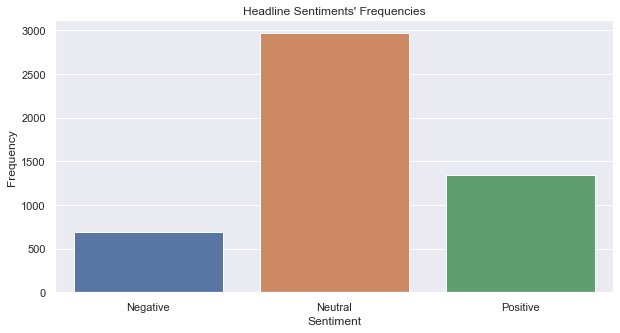

In [31]:
# Arno
import seaborn as sb
import matplotlib.pyplot as plt
sb.set(rc={'figure.figsize':(10,5)})
sentimentFrequencyBarplot = sb.barplot(data=sentimentDistribution,x="Sentiment",y="Frequency").set(title="Headline Sentiments' Frequencies")

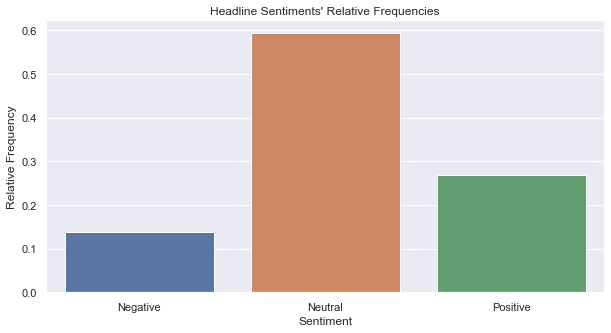

In [32]:
# Arno
# now make the barplot
sentimentRelativeFrequencyBarplot = sb.barplot(data=sentimentDistribution,x="Sentiment",y="Relative Frequency").set(title="Headline Sentiments' Relative Frequencies")

In [33]:
data

,headline,sentiment
0,accord gran company plan production russia com...,0
1,technopoli plan develop stage area 100000 squa...,0
3,new production plant company increase capacity...,1
4,accord company update strategy year 2009–2012 ...,1
5,financing aspocomp growth aspocomp aggressivel...,1
...,...,...
588,look explosion popularity digital casino,0
589,congress pass defense spending bill quickly ai...,0
590,uw researcher employ virtual reality technolog...,0
594,eu announce plan reduce reliance china microchip,1


### Document Term Matrix

In [34]:
# # Daniel 
# # I (Arno) Commented out this section because it wasn't working anyway.
# # Creating Document Term Matrix
# h_just_words = []
# for h in data['headline']:
#     h_just_words.append(re.sub(r'[^a-z\s-]+', '', h).strip())
# data = data.assign(headline_words = h_just_words) # the clean column contains only headlines which were clean as-was

# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(analyzer='word')
# d = cv.fit_transform(data['headline_words'])
# data_dtm = pd.DataFrame(d.toarray(), columns=cv.get_feature_names_out())
# data_dtm.index = data.index
# print(data_dtm.shape)

In [35]:
# # Daniel
# # Creating Document Term Matrix
# h_just_words = []
# for h in data['headline']:
#     h_just_words.append(re.sub(r'[^a-z\s-]+', '', h).strip())
# data = data.assign(headline_words = h_just_words) # the clean column contains only headlines which were clean as-was

# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(analyzer='word')
# d = cv.fit_transform(data['headline_words'])
# data_dtm = pd.DataFrame(d.toarray(), columns=cv.get_feature_names_out())
# data_dtm.index = data.index
# print(data_dtm.shape)

In [36]:
# # Daniel
# # Creating Document Term Matrix
# h_just_words = []
# for h in data['headline']:
#     h_just_words.append(re.sub(r'[^a-z\s-]+', '', h).strip())
# data = data.assign(headline_words = h_just_words) # the clean column contains only headlines which were clean as-was

# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(analyzer='word')
# d = cv.fit_transform(data['headline_words'])
# data_dtm = pd.DataFrame(d.toarray(), columns=cv.get_feature_names_out())
# data_dtm.index = data.index
# print(data_dtm.shape)

In [37]:
# data_dtm.head(10) 

### Counting words relevant to sentiment

In [38]:
#Ethan
#Removed words used just for EDA and analysis of word count
removed_words = ["EUR","eur",":","(",")",",","$","-","Oyj","oyj","mn","mln","In","%","m",".",'"',"'","million","euro"]

cleaned_counted_words = pd.DataFrame(data)
cleaned_counted_words['headline'] = cleaned_counted_words['headline'].apply(lambda x: ' '.join([word for word in x.split() if (word not in removed_words and not any(map(str.isdigit, word)))]))


#separating into three dataframes based on sentiment
clean_count_negative = cleaned_counted_words[cleaned_counted_words["sentiment"] == -1]
clean_count_positive = cleaned_counted_words[cleaned_counted_words["sentiment"] == 1]
clean_count_neutral = cleaned_counted_words[cleaned_counted_words["sentiment"] == 0]

In [39]:
#Ethan
#counts most common words present in each dataset
from collections import Counter
count_words_negative = Counter(" ".join(clean_count_negative["headline"]).split()).most_common(20)
count_words_positive = Counter(" ".join(clean_count_positive["headline"]).split()).most_common(20)
count_words_neutral = Counter(" ".join(clean_count_neutral["headline"]).split()).most_common(20)

#Renames columns
counted_negative_df = pd.DataFrame.from_dict(count_words_negative)
counted_negative_df.columns = ['word','instances']
counted_positive_df = pd.DataFrame.from_dict(count_words_positive)
counted_positive_df.columns = ['word','instances']
counted_neutral_df = pd.DataFrame.from_dict(count_words_neutral)
counted_neutral_df.columns = ['word','instances']


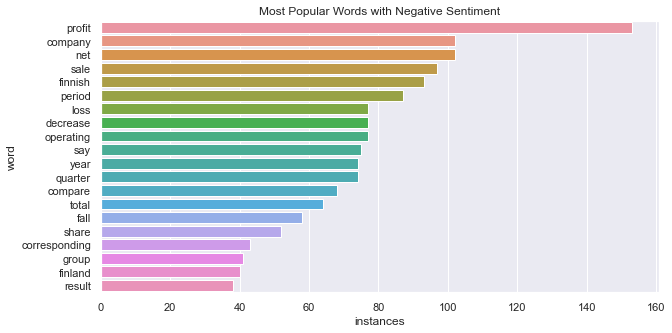

In [40]:
#Ethan
#Opens newplots
import matplotlib.pyplot as plt
plt.close("all")
#fig = plt.figure()
#fig.patch.set_facecolor('white')

#counted_negative_df.plot(kind = 'barh',x='word', y='instances', title='Most Popular Words with Negative Sentiment')
ax = sb.barplot(x = 'instances', y = 'word', data = counted_negative_df).set(title='Most Popular Words with Negative Sentiment')

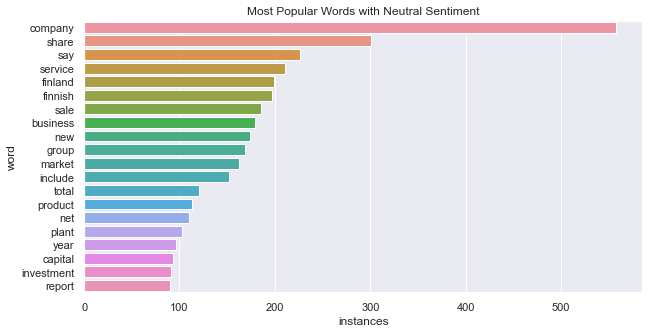

In [41]:
#Ethan
ax = sb.barplot(x = 'instances', y = 'word', data = counted_neutral_df).set(title='Most Popular Words with Neutral Sentiment')

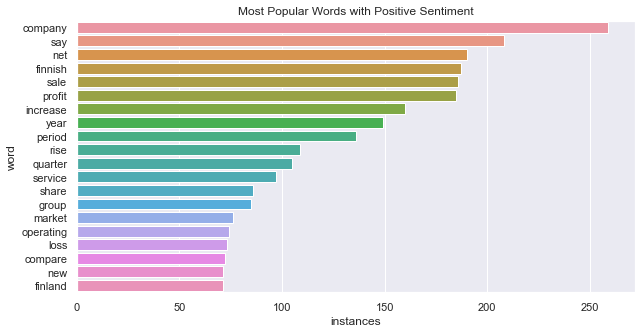

In [42]:
#Ethan
ax = sb.barplot(x = 'instances', y = 'word', data = counted_positive_df).set(title='Most Popular Words with Positive Sentiment')

### Word Cloud

In [43]:
# Arno
from wordcloud import WordCloud # source: https://github.com/amueller/word_cloud  documentation: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
from wordcloud import STOPWORDS
from matplotlib.pyplot import figure

In [44]:
# Arno
allWordsFromData = ""
for h in data["headline"]:
    allWordsFromData += " " + h

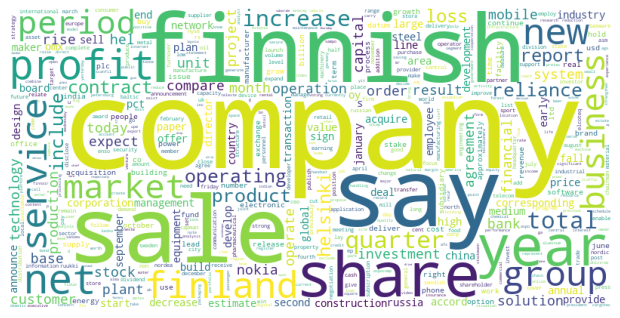

In [45]:
#figure(figsize=(20,10)) #bigger
figure(dpi=80) #will fit in report
wordcloud = WordCloud(background_color="white",width=800,height=400,collocations=False,max_words=500,stopwords=["million","euro"]+list(STOPWORDS)).generate(allWordsFromData)
#wordcloud = WordCloud(background_color="white",width=800,height=400,collocations=False,max_words=500,stopwords=["million","euro"]+list(STOPWORDS)).generate(allWordsFromData)
plt.axis("off")
plt.imshow(wordcloud)

In [46]:
# Arno
print(wordcloud.words_)

{'company': 1.0, 'say': 0.5547128927410617, 'finnish': 0.5308775731310943, 'sale': 0.5200433369447454, 'share': 0.48970747562296857, 'year': 0.466955579631636, 'profit': 0.4387865655471289, 'net': 0.43661971830985913, 'new': 0.3629469122426869, 'finland': 0.35752979414951247, 'service': 0.35102925243770317, 'group': 0.3271939328277356, 'market': 0.29252437703141926, 'business': 0.2838569880823402, 'period': 0.28169014084507044, 'quarter': 0.27518959913326113, 'total': 0.2589382448537378, 'increase': 0.2372697724810401, 'operating': 0.20151679306608883, 'include': 0.20043336944745396, 'reliance': 0.19284940411700974, 'product': 0.18851570964247022, 'contract': 0.17768147345612134, 'loss': 0.17551462621885158, 'helsinki': 0.1733477789815818, 'report': 0.1722643553629469, 'operation': 0.17009750812567714, 'plant': 0.1646803900325027, 'compare': 0.16251354279523295, 'order': 0.15926327193932827, 'base': 0.1581798483206934, 'solution': 0.1581798483206934, 'today': 0.1570964247020585, 'expec

### N-grams

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arnod\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


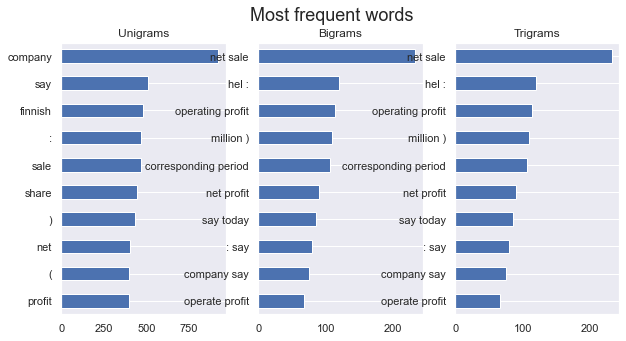

In [47]:
import nltk
nltk.download('punkt')
tokens = nltk.tokenize.word_tokenize(cleaned_counted_words["headline"].str.cat(sep=" "))
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.suptitle("Most frequent words", fontsize=18)

top10 = 10
## unigrams (1-grams)
data_1_grams = pd.DataFrame(nltk.FreqDist(tokens).most_common(), columns=["Word","Freq"])
data_1_grams.set_index("Word").iloc[:top10,:].sort_values(by="Freq").plot(kind="barh", title="Unigrams", ax=ax[0], legend=False).grid(axis='x')
ax[0].set(ylabel=None)

## bigrams (2-grams)
data_2_grams = pd.DataFrame(nltk.FreqDist(nltk.ngrams(tokens, 2)).most_common(), columns=["Word","Freq"])
data_2_grams["Word"] = data_2_grams["Word"].apply(lambda x: " ".join(string for string in x))
data_2_grams.set_index("Word").iloc[:top10,:].sort_values(by="Freq").plot(kind="barh", title="Bigrams", ax=ax[1], legend=False).grid(axis='x')
ax[1].set(ylabel=None)

## trigrams (3-grams)
data_3_grams = pd.DataFrame(nltk.FreqDist(nltk.ngrams(tokens, 2)).most_common(), columns=["Word","Freq"])
data_3_grams["Word"] = data_3_grams["Word"].apply(lambda x: " ".join(string for string in x))
data_3_grams.set_index("Word").iloc[:top10,:].sort_values(by="Freq").plot(kind="barh", title="Trigrams", ax=ax[2], legend=False).grid(axis='x')
ax[2].set(ylabel=None)
plt.show()